In [ ]:
import numpy as np
from sklearn import metrics
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

X = np.array([(1,2), (2,3), (3,2), (5,4)])

# Compute similarity matrix (negative squared Euclidean distance)
similarity_matrix = -euclidean_distances(X, squared=True)

# Set preference as the median of similarity values
np.fill_diagonal(similarity_matrix, np.median(similarity_matrix))

print("Similarity Matrix:")
print(similarity_matrix)


Similarity Matrix:
[[ -3.  -2.  -4. -20.]
 [ -2.  -3.  -2. -10.]
 [ -4.  -2.  -3.  -8.]
 [-20. -10.  -8.  -3.]]


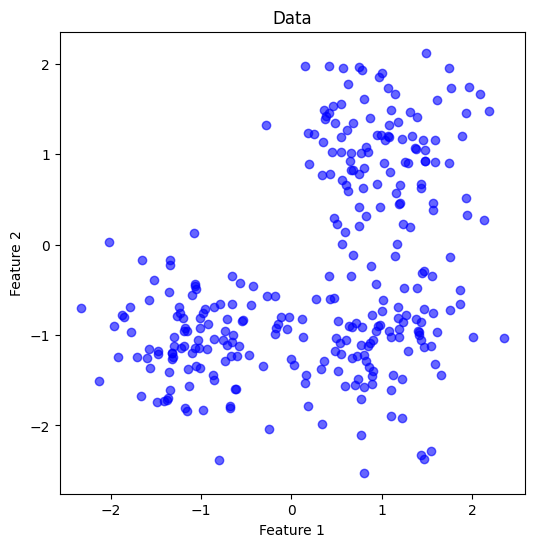

In [ ]:
# Data

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=300, centers=centers, cluster_std=0.5, random_state=0
)

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], color='blue', alpha=0.6)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Data")
plt.show()

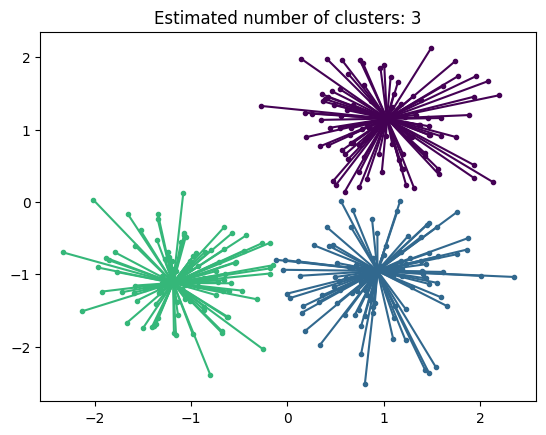

In [ ]:
af = AffinityPropagation(preference=-50, random_state=0).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

plt.close("all")
plt.figure(1)
plt.clf()

colors = plt.cycler("color", plt.cm.viridis(np.linspace(0, 1, 4)))

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.scatter(
        X[class_members, 0], X[class_members, 1], color=col["color"], marker="."
    )
    plt.scatter(
        cluster_center[0], cluster_center[1], s=14, color=col["color"], marker="o"
    )
    for x in X[class_members]:
        plt.plot(
            [cluster_center[0], x[0]], [cluster_center[1], x[1]], color=col["color"]
        )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()